In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

from myConvexHull.process import Convex
from scipy.spatial import ConvexHull

In [2]:
title = "Sepal Length vs Sepal Width"

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


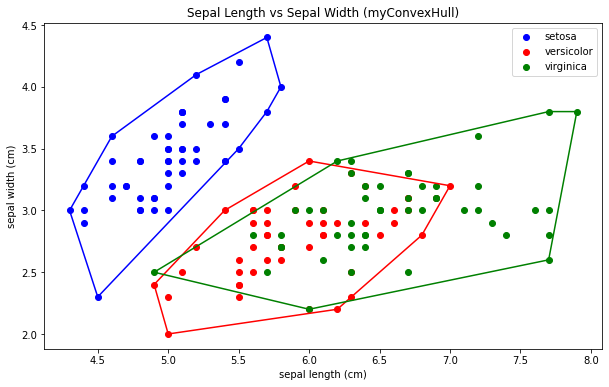

In [3]:
# Penggunaan library myConvexHull
plt.figure(figsize = (10, 6))
plt.title(title + ' (myConvexHull)')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

ConvexObj = Convex()
colors = ['b', 'r', 'g']

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i].iloc[:, [0, 1]].values
    hull = ConvexObj.ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color = colors[i % len(colors)])
    plt.plot(hull[0], hull[1], color = colors[i % len(colors)])
plt.legend()

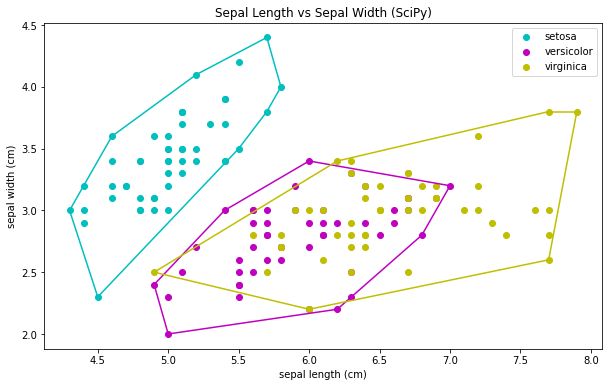

In [4]:
# Perbandingan menggunakan library SciPy
plt.figure(figsize = (10, 6))
plt.title(title + ' (SciPy)')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

scolors = ['c', 'm', 'y']

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i].iloc[:, [0, 1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color = scolors[i % len(scolors)])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], color = scolors[i % len(scolors)])
plt.legend()
